
Summary Statistics:
         ticket_id  customer_id           created_at          resolved_at  \
count  500.000000   500.000000                  500                  500   
mean   250.500000  3041.122000  2024-01-11 09:30:00  2024-01-12 09:30:00   
min      1.000000  1001.000000  2024-01-01 00:00:00  2024-01-02 00:00:00   
25%    125.750000  2091.750000  2024-01-06 04:45:00  2024-01-07 04:45:00   
50%    250.500000  3032.500000  2024-01-11 09:30:00  2024-01-12 09:30:00   
75%    375.250000  4036.750000  2024-01-16 14:15:00  2024-01-17 14:15:00   
max    500.000000  4993.000000  2024-01-21 19:00:00  2024-01-22 19:00:00   
std    144.481833  1126.429528                  NaN                  NaN   

       resolution_time_hours  sentiment_score  actual_resolution_time  
count             500.000000       500.000000                   500.0  
mean               35.142000         0.002726                    24.0  
min                 1.000000        -0.993563                    24.0  
25%  

C:\Users\AMIT\AppData\Local\Temp\ipykernel_16184\3089203564.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='issue_type', data=df, palette='viridis', order=df['issue_type'].value_counts().index)


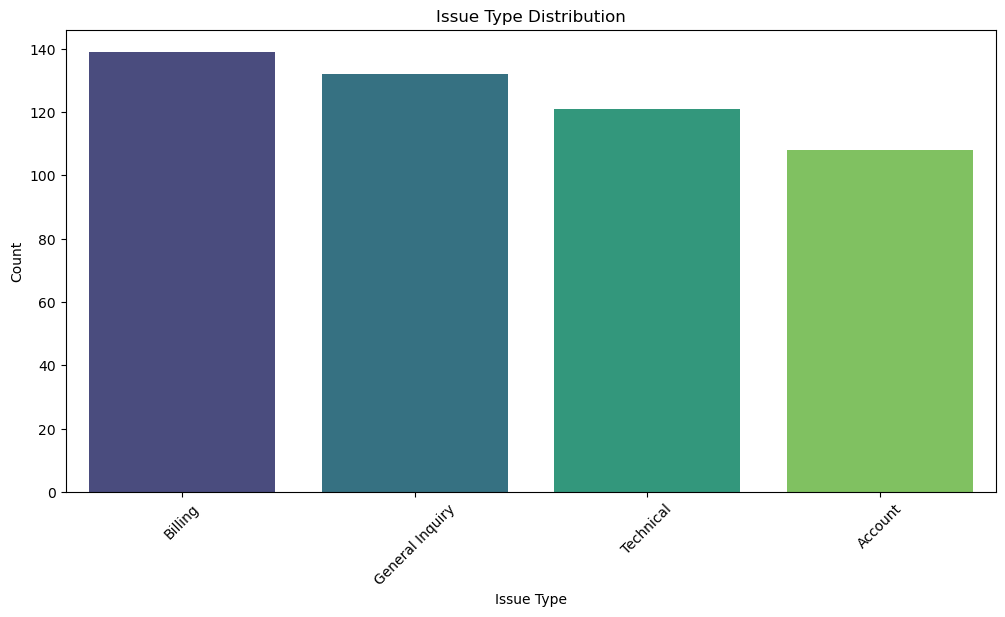

C:\Users\AMIT\AppData\Local\Temp\ipykernel_16184\3089203564.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='priority', y='actual_resolution_time', data=df, palette='coolwarm', order=["Low", "Medium", "High", "Urgent"])


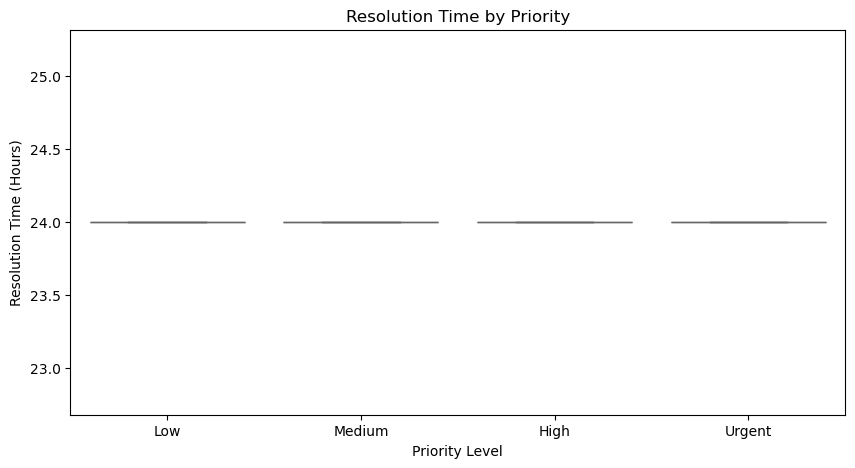


Updated Ticket Status:
 status
Open           132
Resolved       130
In Progress    126
Closed         112
Name: count, dtype: int64
Updated dataset saved as 'customer_tickets_updated.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/AMIT/Downloads/customer_tickets.csv")

# Convert dates to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['resolved_at'] = pd.to_datetime(df['resolved_at'])

# Calculate resolution time in hours
df['actual_resolution_time'] = (df['resolved_at'] - df['created_at']).dt.total_seconds() / 3600

# Basic statistics
print("\nSummary Statistics:\n", df.describe())
print("\nIssue Type Distribution:\n", df['issue_type'].value_counts())
print("\nPriority Distribution:\n", df['priority'].value_counts())
print("\nStatus Distribution:\n", df['status'].value_counts())

# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='issue_type', data=df, palette='viridis', order=df['issue_type'].value_counts().index)
plt.title("Issue Type Distribution")
plt.xlabel("Issue Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Average resolution time per priority
plt.figure(figsize=(10, 5))
sns.boxplot(x='priority', y='actual_resolution_time', data=df, palette='coolwarm', order=["Low", "Medium", "High", "Urgent"])
plt.title("Resolution Time by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Resolution Time (Hours)")
plt.show()

# Automation: Auto-closing tickets resolved for more than 48 hours
def auto_close_tickets(df):
    df.loc[(df['status'] == 'Resolved') & (df['actual_resolution_time'] > 48), 'status'] = 'Closed'
    return df

df = auto_close_tickets(df)
print("\nUpdated Ticket Status:\n", df['status'].value_counts())

# Save cleaned and updated dataset
df.to_csv("customer_tickets_updated.csv", index=False)
print("Updated dataset saved as 'customer_tickets_updated.csv'")
